<a href="https://colab.research.google.com/github/citjimm/DMDS/blob/main/new%20newnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

Pre = pd.read_excel('https://github.com/citjimm/DMDS/raw/main/grade8pre.xlsx')
Pre.columns

Index(['Year', 'Gr', 'County Code', 'District Code', 'School Code',
       'County Name', 'District Name', 'School Name', 'DFG', 'Special Needs',
       'Total Enroll Lang', 'Total Not Present Lang', 'Total Voids Lang',
       'Total APA Lang', 'Valid Scores Lang', 'Total PP Lang', 'Total P Lang',
       'Total AP Lang', 'Mean Scale Score'],
      dtype='object')

In [10]:

xls = pd.ExcelFile('https://github.com/citjimm/DMDS/raw/main/grade8pre.xlsx')

# Print the sheet names
sheet_names = xls.sheet_names
print("Sheet names in the Excel file:", sheet_names)

Sheet names in the Excel file: ['8', '7', '6', '5', '4']


In [11]:

# Define the path to your file
file_path = 'https://github.com/citjimm/DMDS/raw/main/grade8pre.xlsx'

# Load data from each sheet
pre8 = pd.read_excel(file_path, sheet_name='8')
pre7 = pd.read_excel(file_path, sheet_name='7')
pre6 = pd.read_excel(file_path, sheet_name='6')
pre5 = pd.read_excel(file_path, sheet_name='5')
pre4 = pd.read_excel(file_path, sheet_name='4')


In [59]:
state_data = pd.concat([pre4['County Name'], pre5['County Code'], pre6['County Code'], pre7['County Code'], pre8['County Code']], ignore_index=True)
state_data = state_data.value_counts().to_frame().reset_index().rename(columns={'index': 'ST', 'County Code': 'COUNT'})

In [61]:
state_data
all_data

,ST,count
0,7,465
1,CAMDEN,119
2,80,57
3,ST,28
4,CAMDEN,20
5,CHARTER SCHOOLS,11
6,,1
7,CHARTER SC,1


In [ ]:
# prompt: Using dataframe state_data: use state_data to stnadardize all_data

import pandas as pd

# Merge state_data and all_data on the 'ST' column
merged_data = pd.merge(all_data, state_data, on='ST', how='left')

# Standardize the 'count' column using the 'count' column from state_data
merged_data['count_standardized'] = (merged_data['count'] - merged_data['count_y']) / merged_data['count_y']

# Drop the unnecessary columns
merged_data = merged_data.drop(['count_y'], axis=1)

# Rename

In [60]:
pre8

,Year,Gr,County Code,District Code,School Code,County Name,District Name,School Name,DFG,Special Needs,Total Enroll Lang,Total Not Present Lang,Total Voids Lang,Total APA Lang,Valid Scores Lang,Total PP Lang,Total P Lang,Total AP Lang,Mean Scale Score
0,2008,8,ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105993.0,390,544,636,104423.0,18.9,69.7,11.4,220.0
1,2008,8,7,680.0,,CAMDEN,CAMDEN CITY,CAMDEN CITY,A,Y,999.0,31,7,0,961.0,63.8,35.7,0.5,189.5
2,2008,8,7,680.0,100,CAMDEN,CAMDEN CITY,BONSALL,A,Y,59.0,0,0,0,59.0,50.8,49.2,0.0,197.4
3,2008,8,7,680.0,165,CAMDEN,CAMDEN CITY,COOPERS POYNT,A,Y,52.0,1,0,0,51.0,49.0,51.0,0.0,197.8
4,2008,8,7,680.0,45,CAMDEN,CAMDEN CITY,EAST CAMDEN MIDDLE,A,Y,224.0,5,0,0,219.0,54.3,44.3,1.4,193.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2014,8,7,680.0,80,CAMDEN,CAMDEN CITY,VETERANS MEMORIAL MIDDLE,A,Y,90.0,0,0,0,90.0,65.6,34.4,0.0,188.1
103,2014,8,7,680.0,340,CAMDEN,CAMDEN CITY,WHITTIER,A,Y,19.0,0,0,0,19.0,52.6,47.4,0.0,199.7
104,2014,8,7,680.0,360,CAMDEN,CAMDEN CITY,YORKSHIP,A,Y,NaN,*,*,*,NaN,NaN,NaN,NaN,NaN
105,2014,8,80,6215.0,910,CHARTER SCHOOLS,CAMDENS PROMISE,CAMDENS PROMISE,R,,95.0,0,0,0,95.0,25.3,72.6,2.1,210.2


In [30]:

columns_to_convert = ['Total Enroll Lang', 'Valid Scores Lang', 'Total PP Lang', 'Total P Lang', 'Total AP Lang', 'Mean Scale Score']

for column in columns_to_convert:
   pre8[column] = pd.to_numeric(pre8[column], errors='coerce')

pre8['Year'] = pd.to_numeric(pre8['Year'], errors='coerce')


In [31]:
import pandas as pd
import numpy as np

years = [2008, 2009, 2010, 2011, 2012, 2013, 2014]

results = []

for year in years:
    camden_city_criteria = ((pre8['School Name'].str.contains('CAMDEN CITY', case=False, na=False)) &
                            (pre8['Year'] == year))

    #charter_criteria = ((pre8['District Name'].str.contains('CHARTER', case=False, na=False)) &
                       # (pre8['Year'] == year))


    #combined_criteria = camden_city_criteria | charter_criteria


    preint_filtered = pre8[camden_city_criteria]

    score_columns = ['Total PP Lang', 'Total P Lang', 'Total AP Lang', 'Mean Scale Score']
    count_column = 'Valid Scores Lang'


    weighted_sums = (preint_filtered[score_columns].T * preint_filtered[count_column]).T.sum()
    total_valid_test_takers = preint_filtered[count_column].sum()
    total_enrollment = preint_filtered['Valid Scores Lang'].sum()


    weighted_averages = weighted_sums / total_valid_test_takers


    results.append({
        'Year': year,
        'PP': weighted_averages.get('Total PP Lang', np.nan),
        'P': weighted_averages.get('Total P Lang', np.nan),
        'AP': weighted_averages.get('Total AP Lang', np.nan),
        'Mean Scale Score': weighted_averages.get('Mean Scale Score', np.nan),
        'Total Valid Test Takers': total_valid_test_takers,
        'Total Enrollment': total_enrollment
    })


preintresults_district = pd.DataFrame(results)


print(preintresults_district)

   Year    PP     P   AP  Mean Scale Score  Total Valid Test Takers  \
0  2008  63.8  35.7  0.5             189.5                    961.0   
1  2009  61.4  38.4  0.1             190.8                    760.0   
2  2010  66.2  33.2  0.5             190.5                    794.0   
3  2011  68.6  30.9  0.5             187.7                    794.0   
4  2012  67.0  32.6  0.4             188.7                    773.0   
5  2013  68.0  31.4  0.6             190.1                    856.0   
6  2014  68.0  31.6  0.4             191.0                    823.0   

   Total Enrollment  
0             961.0  
1             760.0  
2             794.0  
3             794.0  
4             773.0  
5             856.0  
6             823.0  


In [33]:
# prompt: code to combine p and ap into one column adding the percent value

preintresults_district['Total P/AP'] = preintresults_district['P'] + preintresults_district['AP']


In [34]:
# Group by 'Year' and sum up 'Total PP Lang'
total_pp_per_year = preintresults_district.groupby('Year')['Total P/AP'].sum().reset_index()
print(total_pp_per_year)

   Year  Total P/AP
0  2008        36.2
1  2009        38.5
2  2010        33.7
3  2011        31.4
4  2012        33.0
5  2013        32.0
6  2014        32.0


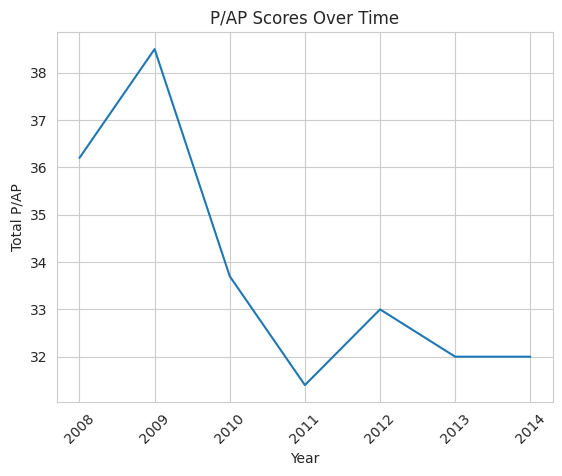

In [35]:
# prompt: graph showing p/ap overtime

import matplotlib.pyplot as plt

plt.plot(preintresults_district['Year'], preintresults_district['Total P/AP'])

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Total P/AP")
plt.title("P/AP Scores Over Time")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


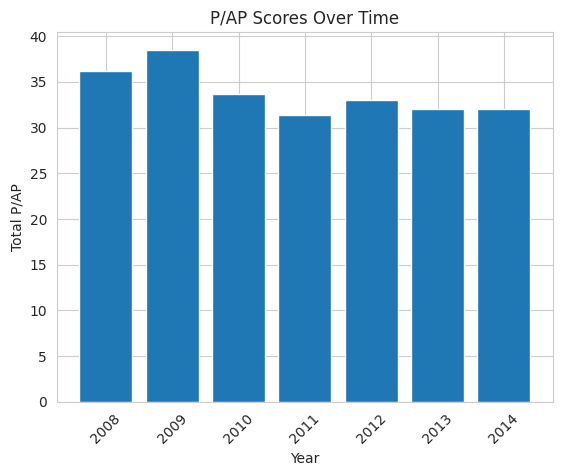

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create the bar chart
plt.bar(preintresults_district['Year'], preintresults_district['Total P/AP'])

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Total P/AP")
plt.title("P/AP Scores Over Time")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(total_pp_per_year['Year'], total_pp_per_year['PP'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('partial proficeny percentage')
plt.title('Total Partial Proficentcy in Language Arts Over the Years')
plt.xticks(rotation=45)  # Rotate years for better readability
plt.show()


KeyError: 'PP'

<Figure size 1000x600 with 0 Axes>

##copy

In [12]:
import pandas as pd

def convert_columns(df):
    columns_to_convert = ['Total Enroll Lang', 'Valid Scores Lang', 'Total PP Lang', 'Total P Lang', 'Total AP Lang', 'Mean Scale Score']
    for column in columns_to_convert:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    return df


In [13]:
pre4 = convert_columns(pre4)
pre5 = convert_columns(pre5)
pre6 = convert_columns(pre6)
pre7 = convert_columns(pre7)
pre8 = convert_columns(pre8)


#here

In [14]:
import pandas as pd
import numpy as np

def process_data(df, grade):
    years = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
    results = []

    for year in years:
        camden_city_criteria = (df['School Name'].str.contains('CAMDEN CITY', case=False, na=False) &
                                (df['Year'] == year))

       # charter_criteria = (df['District Name'].str.contains('CHARTER', case=False, na=False) &
                            #(df['Year'] == year))

        #combined_criteria = camden_city_criteria | charter_criteria

        filtered = df[camden_city__criteria]
        score_columns = ['Total PP Lang', 'Total P Lang', 'Total AP Lang', 'Mean Scale Score']
        count_column = 'Valid Scores Lang'

        weighted_sums = (filtered[score_columns].T * filtered[count_column]).T.sum()
        total_valid_test_takers = filtered[count_column].sum()

        weighted_averages = weighted_sums / total_valid_test_takers

        results.append({
            'Year': year,
            'Grade': grade,
            'PP': weighted_averages.get('Total PP Lang', np.nan),
            'P': weighted_averages.get('Total P Lang', np.nan),
            'AP': weighted_averages.get('Total AP Lang', np.nan),
            'Mean Scale Score': weighted_averages.get('Mean Scale Score', np.nan),
            'Total Valid Test Takers': total_valid_test_takers,
        })

    return pd.DataFrame(results)


In [41]:
# Assuming pre4, pre5, pre6, pre7 have a 'Grade' column specifying the grade
# Example: pre4['Grade'] = 'Grade 4' and so on, before concatenating
all_data = pd.concat([pre4, pre5, pre6, pre7, pre8], ignore_index=True)


In [50]:
# prompt: Total AP Lang and Total P Lang add into one Proficent

all_data['Proficent'] = all_data['Total P Lang'] + all_data['Total AP Lang']

# Now you can use the 'Proficent' column for further analysis or calculations.

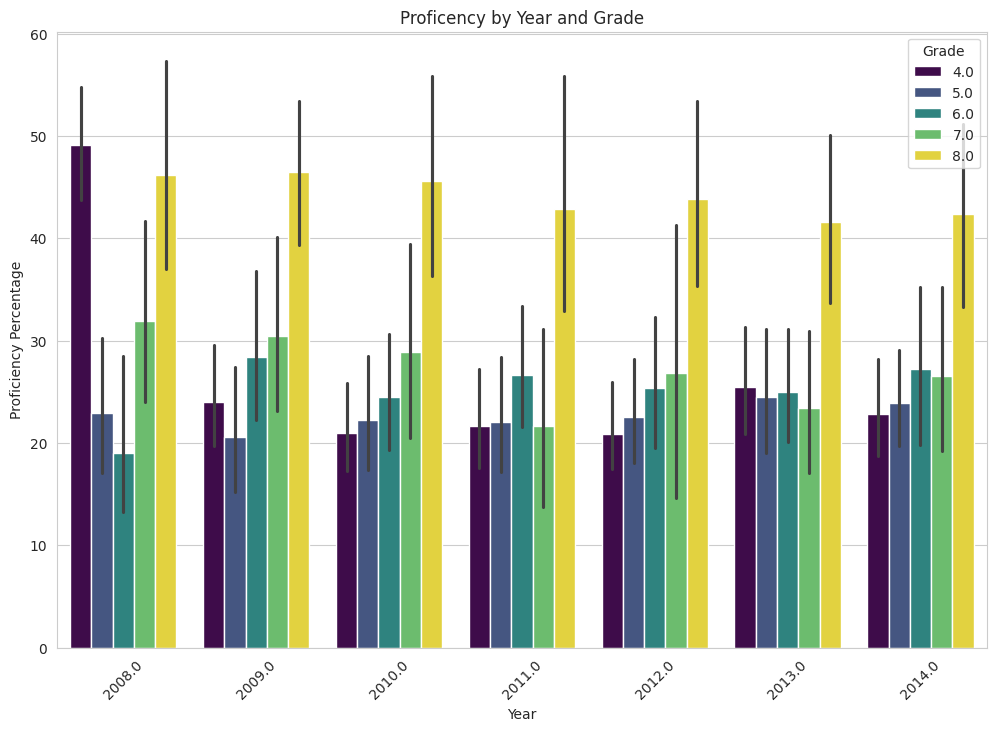

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for 'Mean Scale Score' over years, grouped by 'Grade'
plt.figure(figsize=(12, 8))  # Adjust size as necessary
bar_plot = sns.barplot(x='Year', y='Proficent', hue='Gr', data=all_data, palette='viridis')

# Add title and labels
plt.title('Proficency by Year and Grade')
plt.xlabel('Year')
plt.ylabel('Proficiency Percentage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='Grade', loc='upper right')

# Show the plot
plt.show()


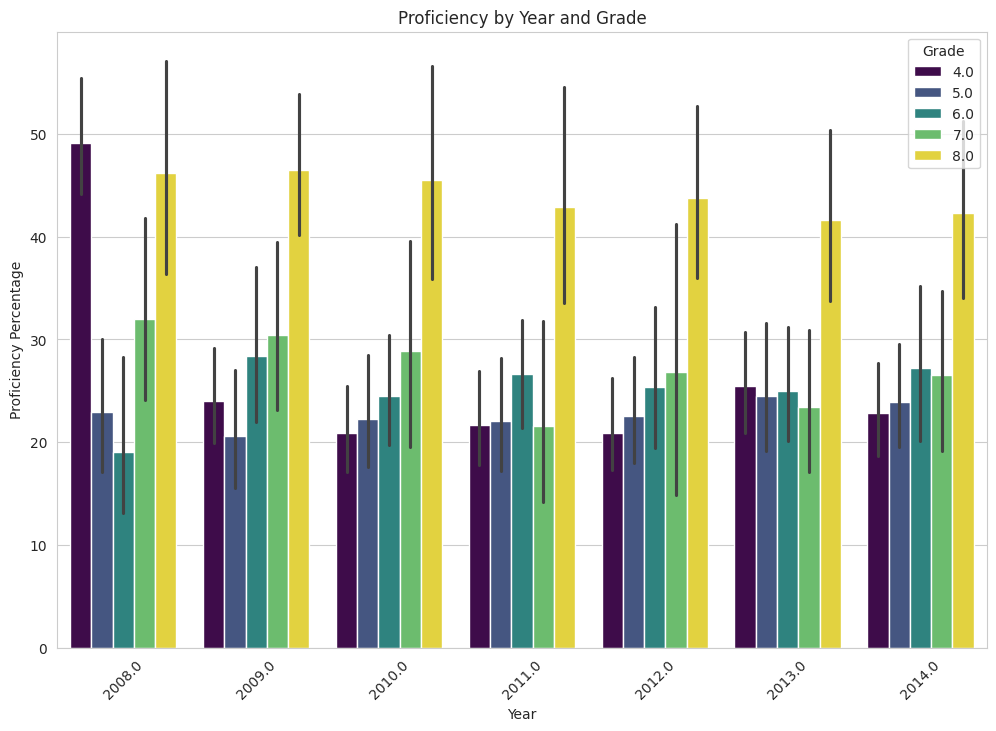

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for 'Mean Scale Score' over years, grouped by 'Grade'
plt.figure(figsize=(12, 8))  # Adjust size as necessary
bar_plot = sns.barplot(x='Year', y='Proficent', hue='Gr', data=all_data, palette='viridis')

# Add title and labels
plt.title('Proficiency by Year and Grade')
plt.xlabel('Year')
plt.ylabel('Proficiency Percentage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='Grade', loc='upper right')

# Show the plot
plt.show()


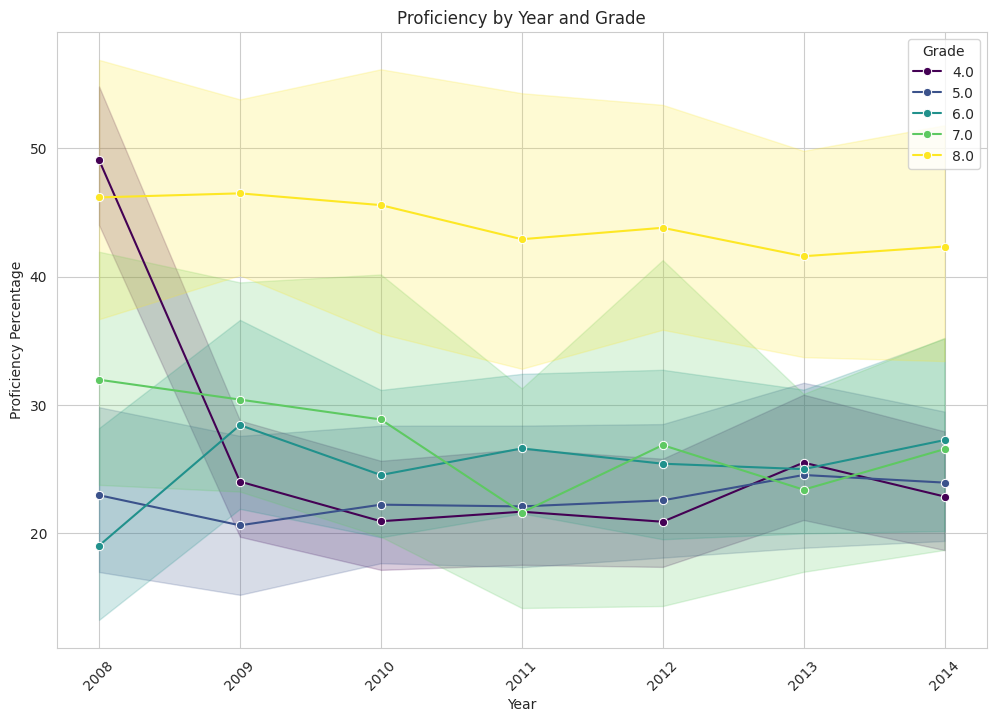

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a line plot for 'Proficient' over years, grouped by 'Grade'
plt.figure(figsize=(12, 8))  # Adjust size as necessary
line_plot = sns.lineplot(x='Year', y='Proficent', hue='Gr', data=all_data, palette='viridis', marker='o')

# Add title and labels
plt.title('Proficiency by Year and Grade')
plt.xlabel('Year')
plt.ylabel('Proficiency Percentage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='Grade', loc='upper right')

# Show the plot
plt.show()


In [52]:
all_data.head()

,Year,Gr,County Code,District Code,School Code,County Name,District Name,School Name,DFG,Special Needs,Total Enroll Lang,Total Not Present Lang,Total Voids Lang,Total APA Lang,Valid Scores Lang,Total PP Lang,Total P Lang,Total AP Lang,Mean Scale Score,Proficent
0,2008.0,4.0,ST,,,,,,,,102719.0,300,930,749,100740.0,17.4,78.0,4.6,215.6,82.6
1,2008.0,4.0,7,680,0,CAMDEN,CAMDEN CITY,CAMDEN CITY,A,Y,1096.0,12,27,0,1057.0,52.6,46.9,0.5,190.0,47.4
2,2008.0,4.0,7,680,100,CAMDEN,CAMDEN CITY,BONSALL E.S.,A,Y,93.0,1,3,0,89.0,41.6,55.1,3.4,194.1,58.5
3,2008.0,4.0,7,680,145,CAMDEN,CAMDEN CITY,OCTAVIUS CATTO DEMONSTRATION SCHOOL,A,Y,50.0,3,2,0,45.0,53.3,46.7,0.0,190.3,46.7
4,2008.0,4.0,7,680,165,CAMDEN,CAMDEN CITY,COOPER'S POYNT E.S.,A,Y,44.0,0,0,0,44.0,38.6,59.1,2.3,200.9,61.4


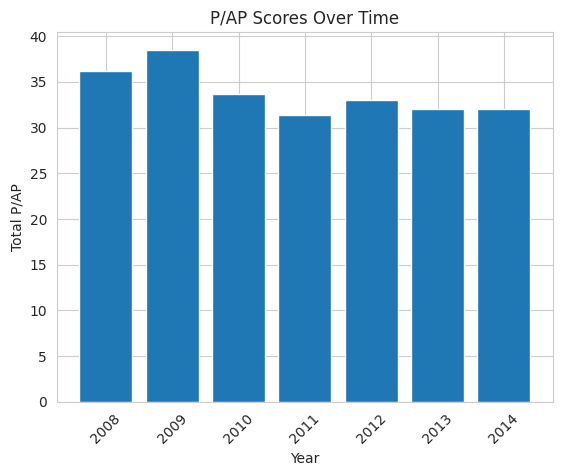

KeyError: 'Proficency'

In [45]:
# prompt: graph for above? trend?

import pandas as pd
import matplotlib.pyplot as plt
# Create the bar chart
plt.bar(preintresults_district['Year'], preintresults_district['Total P/AP'])

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Total P/AP")
plt.title("P/AP Scores Over Time")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Create a line chart
plt.plot(preintresults_district['Year'], preintresults_district['Proficency'])

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Total P/AP")
plt.title("P/AP Scores Over Time")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Calculate the trend line
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(preintresults_district['Year'], preintresults_district['Total P/AP'])

# Create a new DataFrame with predicted values
predicted_values = pd.DataFrame({
    'Year': range(2008, 2015),
    'Total P/AP': slope * range(2008, 2015) + intercept
})

# Plot the original data and the trend line
plt.plot(preintresults_district['Year'], preintresults_district['Total P/AP'], label='Original Data')
plt.plot(predicted_values['Year'], predicted_values['Total P/AP'], color='red', label='Trend Line')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Total P/AP")
plt.title("P/AP Scores Over Time with Trend Line")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.legend()
plt.show()


In [103]:
import pandas as pd

def extract_state_data(file_path, ST):
    state_data = file_path[file_path['County Code'] == ST]
    return state_data

# Apply the function to each grade DataFrame
state_data_pre4 = extract_state_data(pre4, 'ST')
state_data_pre5 = extract_state_data(pre5, 'ST')
state_data_pre6 = extract_state_data(pre6, 'ST')
state_data_pre7 = extract_state_data(pre7, 'ST')
state_data_pre8 = extract_state_data(pre8, 'ST')

In [104]:
state_data_pre4

,Year,Gr,County Code,District Code,School Code,County Name,District Name,School Name,DFG,Special Needs,Total Enroll Lang,Total Not Present Lang,Total Voids Lang,Total APA Lang,Valid Scores Lang,Total PP Lang,Total P Lang,Total AP Lang,Mean Scale Score
22,2009.0,4.0,ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103360.0,130,467,698,102065.0,37.0,56.3,6.7,206.5
44,2010.0,4.0,ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103410.0,149,457,827,101977.0,40.4,50.3,9.3,203.6
67,2011.0,4.0,ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103338.0,142,422,930,101844.0,37.3,55.5,7.2,204.7
89,2012.0,4.0,ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101995.0,95,407,989,100504.0,41.5,54.5,4.0,202.7
112,2013.0,4.0,ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102845.0,136,397,1014,101298.0,40.6,51.0,8.4,204.6
134,2014.0,NaN,ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103176.0,190,557,977,101452.0,40.2,56.2,3.6,202.5


In [105]:
def calculate_z_scores(all_data, state_data):
    # Ensure state data has necessary statistics per grade and year
    state_stats = state_data.groupby(['Year', 'Gr'])['Mean Scale Score'].agg(['mean', 'std']).reset_index()
    state_stats.rename(columns={'mean': 'State_Mean', 'std': 'State_Std'}, inplace=True)

    # Merge the grade data with state statistics
    merged_df = pd.merge(all_data, state_stats, on=['Year', 'Gr'], how='left')

    # Calculate Z-scores
    merged_df['Z_Score'] = (merged_df['Mean Scale Score'] - merged_df['State_Mean']) / merged_df['State_Std']

    return merged_df

# Example: Assigning grade levels to state data before using it for Z-score calculations
state_data_pre4['Grade'] = 'Grade 4'
state_data_pre5['Grade'] = 'Grade 5'
state_data_pre6['Grade'] = 'Grade 6'
state_data_pre7['Grade'] = 'Grade 7'
state_data_pre8['Grade'] = 'Grade 8'

# Concatenate all state data into one DataFrame
state_data_all = pd.concat([state_data_pre4, state_data_pre5, state_data_pre6, state_data_pre7, state_data_pre8], ignore_index=True)

# Calculate Z-scores for the concatenated data of all grades
all_data_with_z_scores = calculate_z_scores(all_data, state_data_all)


<ipython-input-105-64745f59520a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data_pre4['Grade'] = 'Grade 4'
<ipython-input-105-64745f59520a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data_pre5['Grade'] = 'Grade 5'
<ipython-input-105-64745f59520a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [107]:
all_data_with_z_scores

,Year,Gr,County Code,District Code,School Code,County Name,District Name,School Name,DFG,Special Needs,...,Total Voids Lang,Total APA Lang,Valid Scores Lang,Total PP Lang,Total P Lang,Total AP Lang,Mean Scale Score,State_Mean,State_Std,Z_Score
0,2008.0,4.0,ST,,,,,,,,...,930,749,100740.0,17.4,78.0,4.6,215.6,NaN,NaN,NaN
1,2008.0,4.0,7,680,0,CAMDEN,CAMDEN CITY,CAMDEN CITY,A,Y,...,27,0,1057.0,52.6,46.9,0.5,190.0,NaN,NaN,NaN
2,2008.0,4.0,7,680,100,CAMDEN,CAMDEN CITY,BONSALL E.S.,A,Y,...,3,0,89.0,41.6,55.1,3.4,194.1,NaN,NaN,NaN
3,2008.0,4.0,7,680,145,CAMDEN,CAMDEN CITY,OCTAVIUS CATTO DEMONSTRATION SCHOOL,A,Y,...,2,0,45.0,53.3,46.7,0.0,190.3,NaN,NaN,NaN
4,2008.0,4.0,7,680,165,CAMDEN,CAMDEN CITY,COOPER'S POYNT E.S.,A,Y,...,0,0,44.0,38.6,59.1,2.3,200.9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2014.0,8.0,7,680.0,80,CAMDEN,CAMDEN CITY,VETERANS MEMORIAL MIDDLE,A,Y,...,0,0,90.0,65.6,34.4,0.0,188.1,220.1,NaN,NaN
704,2014.0,8.0,7,680.0,340,CAMDEN,CAMDEN CITY,WHITTIER,A,Y,...,0,0,19.0,52.6,47.4,0.0,199.7,220.1,NaN,NaN
705,2014.0,8.0,7,680.0,360,CAMDEN,CAMDEN CITY,YORKSHIP,A,Y,...,*,*,NaN,NaN,NaN,NaN,NaN,220.1,NaN,NaN
706,2014.0,8.0,80,6215.0,910,CHARTER SCHOOLS,CAMDENS PROMISE,CAMDENS PROMISE,R,,...,0,0,95.0,25.3,72.6,2.1,210.2,220.1,NaN,NaN


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Z_Score, dtype: float64


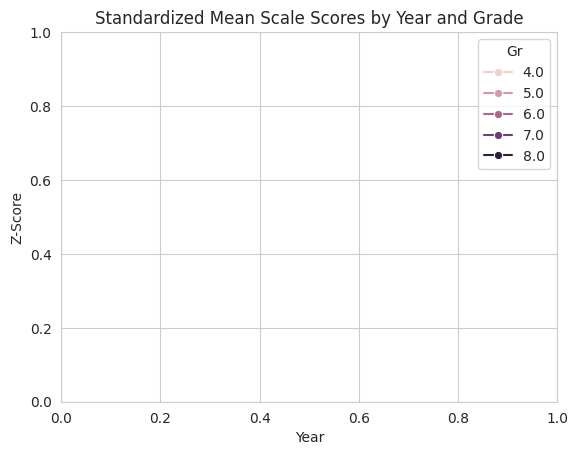

In [108]:
# Check the distribution of Z-scores
print(all_data_with_z_scores['Z_Score'].describe())

# Possible further analysis or visualization
# For example, plotting Z-scores across years for each grade
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=all_data_with_z_scores, x='Year', y='Z_Score', hue='Gr', marker='o')
plt.title('Standardized Mean Scale Scores by Year and Grade')
plt.xlabel('Year')
plt.ylabel('Z-Score')
plt.show()


# post

In [1]:
import pandas as pd

Post= pd.read_excel('https://github.com/citjimm/DMDS/raw/main/post%208.xlsx')
Post.columns

Index(['COUNTY CODE', 'COUNTY NAME', 'DISTRICT CODE', 'DISTRICT NAME',
       'SCHOOL CODE', 'SCHOOL NAME', 'DFG', 'SUBGROUP', 'SUBGROUP_TYPE',
       'REGISTERED TO TEST', 'NOT TESTED ** (See Below)', 'VALID SCORES',
       'MEAN SCALE SCORE', 'L1 PERCENT', 'L2 PERCENT', 'L3 PERCENT',
       'L4 PERCENT', 'L5 PERCENT', 'Year', 'Grade'],
      dtype='object')

In [3]:

xlx = pd.ExcelFile('https://github.com/citjimm/DMDS/raw/main/post%208.xlsx')

# Print the sheet names
sheets_names = xlx.sheet_names
print("Sheet names in the Excel file:", sheets_names)

Sheet names in the Excel file: ['post 8', '7', '6', '5', '4']


In [8]:

# Define the path to your file
file_pathpost = 'https://github.com/citjimm/DMDS/raw/main/post%208.xlsx'

# Load data from each sheet
post8 = pd.read_excel(file_pathpost, sheet_name='post 8')
post7 = pd.read_excel(file_pathpost, sheet_name='7')
post6 = pd.read_excel(file_pathpost, sheet_name='6')
post5 = pd.read_excel(file_pathpost, sheet_name='5')
post4 = pd.read_excel(file_pathpost, sheet_name='4')


In [32]:
import pandas as pd

def convert_columns(dfp):
    columns_to_convert = ['VALID SCORES', 'L1 PERCENT', 'L2 PERCENT', 'L3 PERCENT',
       'L4 PERCENT', 'L5 PERCENT', 'MEAN SCALE SCORE']
    for column in columns_to_convert:
      dfp[column] = pd.to_numeric(dfp[column], errors='coerce')
    dfp['Year'] = pd.to_numeric(dfp['Year'], errors='coerce')
    return dfp


In [33]:
post8.columns

Index(['COUNTY CODE', 'COUNTY NAME', 'DISTRICT CODE', 'DISTRICT NAME',
       'SCHOOL CODE', 'SCHOOL NAME', 'DFG', 'SUBGROUP', 'SUBGROUP_TYPE',
       'REGISTERED TO TEST', 'NOT TESTED ** (See Below)', 'VALID SCORES',
       'MEAN SCALE SCORE', 'L1 PERCENT', 'L2 PERCENT', 'L3 PERCENT',
       'L4 PERCENT', 'L5 PERCENT', 'Year', 'Grade'],
      dtype='object')

In [34]:
post4 = convert_columns(post4)
post5 = convert_columns(post5)
post6 = convert_columns(post6)
post7 = convert_columns(post7)
post8 = convert_columns(post8)


In [49]:
import pandas as pd
import numpy as np

def process_data(dfp, grade):
    years = [2015, 2016, 2017, 2018, 2019]
    results = []

  camden_city_criteria = (
    dfp['SCHOOL NAME'].str.contains('CAMDEN CITY', case=False, na=False) &
    (dfp['Year'] == year) &
    dfp['SUBGROUP'].str.upper().isin(['TOTAL'])
)
        #camden_city_criteria = (dfp['SCHOOL NAME'].str.contains('CAMDEN CITY', case=False, na=False) &
                                #(dfp['Year'] == year))

       # charter_criteria = (df['District Name'].str.contains('CHARTER', case=False, na=False) &
                            #(df['Year'] == year))

        #combined_criteria = camden_city_criteria | charter_criteria

        filtered = dfp[camden_city__criteria]
        score_columns = ['L1 PERCENT', 'L2 PERCENT', 'L3 PERCENT',
       'L4 PERCENT', 'L5 PERCENT', 'MEAN SCALE SCORE']
        count_column = 'VALID SCORES'

        weighted_sums = (filtered[score_columns].T * filtered[count_column]).T.sum()
        total_valid_test_takers = filtered[count_column].sum()

        weighted_averages = weighted_sums / total_valid_test_takers

        results.append({
            'Year': year,
            'Grade': grade,
            'PP': weighted_averages.get('Total PP Lang', np.nan),
            'P': weighted_averages.get('Total P Lang', np.nan),
            'AP': weighted_averages.get('Total AP Lang', np.nan),
            'Mean Scale Score': weighted_averages.get('Mean Scale Score', np.nan),
            'Total Valid Test Takers': total_valid_test_takers,
        })

    return pd.DataFrame(results)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

In [50]:
import pandas as pd
import numpy as np

def process_data(dfp, grade):
    years = [2015, 2016, 2017, 2018, 2019]
    results = []

    for year in years:
        camden_city_criteria = (
            dfp['SCHOOL NAME'].str.contains('CAMDEN CITY', case=False, na=False) &
            (dfp['Year'] == year) &
            dfp['SUBGROUP'].str.upper().isin(['TOTAL'])
        )

        filtered = dfp[camden_city_criteria]
        score_columns = ['L1 PERCENT', 'L2 PERCENT', 'L3 PERCENT',
       'L4 PERCENT', 'L5 PERCENT', 'MEAN SCALE SCORE']
        count_column = 'VALID SCORES'

        weighted_sums = (filtered[score_columns].T * filtered[count_column]).T.sum()
        total_valid_test_takers = filtered[count_column].sum()

        weighted_averages = weighted_sums / total_valid_test_takers

        results.append({
            'Year': year,
            'Grade': grade,
            'PP': weighted_averages.get('Total PP Lang', np.nan),
            'P': weighted_averages.get('Total P Lang', np.nan),
            'AP': weighted_averages.get('Total AP Lang', np.nan),
            'Mean Scale Score': weighted_averages.get('Mean Scale Score', np.nan),
            'Total Valid Test Takers': total_valid_test_takers,
        })

    return pd.DataFrame(results)

In [51]:
all_datapost = pd.concat([post4, post5, post6, post7, post8], ignore_index=True)


In [52]:
all_datapost['Proficent'] = all_datapost['L4 PERCENT'] + all_datapost['L5 PERCENT']

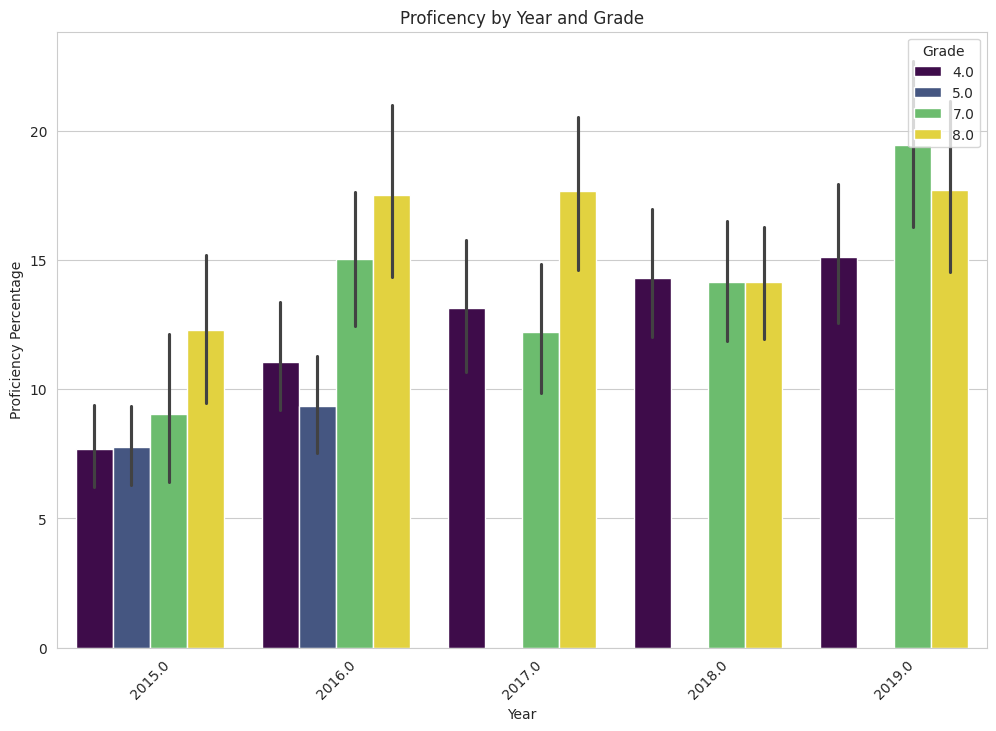

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for 'Mean Scale Score' over years, grouped by 'Grade'
plt.figure(figsize=(12, 8))  # Adjust size as necessary
bar_plot = sns.barplot(x='Year', y='Proficent', hue='Grade', data=all_datapost, palette='viridis')

# Add title and labels
plt.title('Proficency by Year and Grade')
plt.xlabel('Year')
plt.ylabel('Proficiency Percentage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='Grade', loc='upper right')

# Show the plot
plt.show()


# New Section